In [20]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

import adabmDCA
from adabmDCA.utils import get_device, get_dtype, get_mask_save
from adabmDCA.sampling import get_sampler
from adabmDCA.functional import one_hot

from sklearn.linear_model import LinearRegression

import sys
sys.path.append('..')
import indep_sites, utils

In [59]:
import pickle

filename = "paths_indep_sites.pkl"
filepath = "saved/paths_indep_sites/" + filename

with open(filepath, 'rb') as f:
    logps_paths = pickle.load(f)

path_labels = ['norm A, norm W', 'fast A, norm W', 'norm A, high W', 'fast A, high W']
idx = {'norm A, norm W': 0, 'fast A, norm W' : 1, 'norm A, high W' : 2, 'fast A, high W' : 3}

In [91]:
x = logps_paths[idx['norm A, norm W']] - logps_paths[idx['norm A, high W']]
y = logps_paths[idx['fast A, norm W']] - logps_paths[idx['fast A, high W']]

In [92]:
reg = LinearRegression().fit(x.reshape(-1, 1), y)
reg.coef_, reg.intercept_

(array([-0.33999053], dtype=float32), np.float32(-0.05324912))

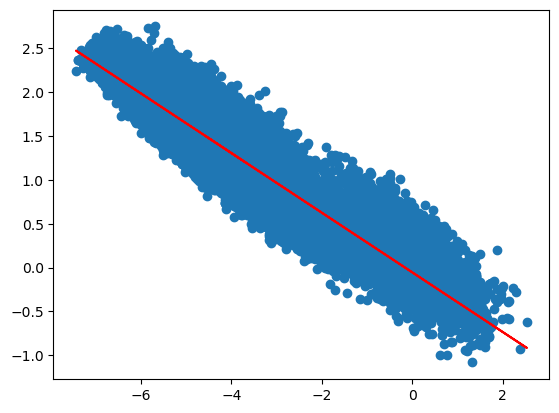

In [93]:
N = 10**5
subs = random.sample(range(len(x1)), N)
plt.scatter(x[subs], y[subs])
plt.plot(x[subs], reg.predict(x[subs].reshape(-1,1)), color='r')

In [39]:
x = logps_paths[idx['norm A, norm W']] - logps_paths[idx['fast A, norm W']]
y = logps_paths[idx['norm A, high W']] - logps_paths[idx['fast A, high W']]

In [40]:
reg = LinearRegression().fit(x.reshape(-1, 1), y)
reg.coef_, reg.intercept_

(array([0.43487757], dtype=float32), np.float32(-0.07407522))

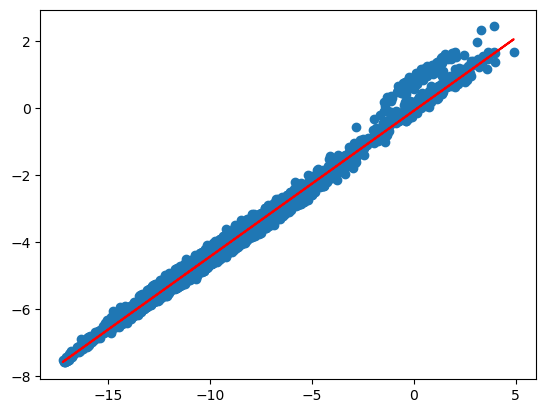

In [41]:
N = 10**4
subs = random.sample(range(len(x1)), N)
plt.scatter(x[subs], y[subs])
plt.plot(x[subs], reg.predict(x[subs].reshape(-1,1)), color='r')

In [94]:
def scatter_logps_pair(ids, N=10**4):
    x = logps_paths[ids[0]]
    y = logps_paths[ids[1]]
    
    N = 10**5
    subs = random.sample(range(len(x)), N)
    fig, ax = plt.subplots(figsize=(3,3))
    ax.scatter(x[subs], y[subs])
    
    reg = LinearRegression().fit(x.reshape(-1, 1), y)
    ax.plot(x[subs], reg.predict(x[subs].reshape(-1,1)), color='r')
    ax.set_xlabel(f'logps - {path_labels[ids[0]]}'); plt.ylabel(f'logps - {path_labels[ids[1]]}')
    lim = (min(x.min(), y.min()) - 2, max(x.max(), y.max()) + 2)
    ax.set_xlim(lim); ax.set_ylim(lim)
    
    print(f'Slope = {float(reg.coef_[0])}')
    # print(f'Intercept = {float(reg.intercept_)}')

Slope = 0.7228376269340515


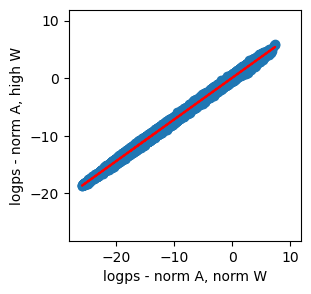

In [95]:
scatter_logps_pair([0,2])

Slope = 0.33320245146751404


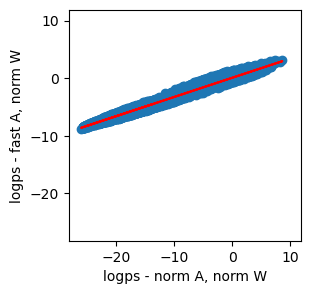

In [96]:
scatter_logps_pair([0,1])

Slope = 1.2802684307098389


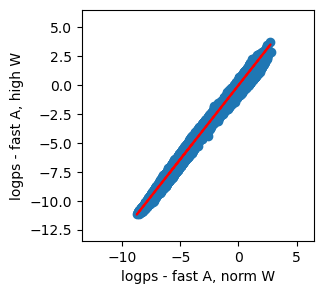

In [97]:
scatter_logps_pair([1,3])

Slope = 0.598483145236969


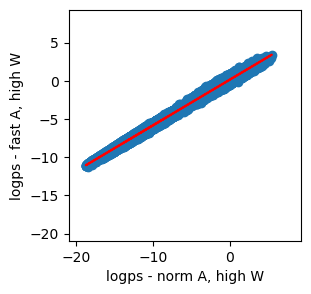

In [98]:
scatter_logps_pair([2,3])